In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('쇼핑리뷰_train.csv')
test_data = pd.read_csv('쇼핑리뷰_test.csv')

[(np.str_("['재구매']"), 16), (np.str_("['배송', '너무', '느려요']"), 14), (np.str_("['배송', '빠르고', '좋아요']"), 7), (np.str_("['배송', '빨라요']"), 7), (np.str_("['좋아요']"), 6), (np.str_("['그냥', '그래요']"), 6), (np.str_("['배송', '너무', '느립니다']"), 6), (np.str_("['별로']"), 6), (np.str_("['사이즈', '작아요']"), 6), (np.str_("['별로', '예요']"), 5), (np.str_("['별로', '에요']"), 5), (np.str_("['생각', '보다', '별로', '요']"), 5), (np.str_("['그저', '그래요']"), 4), (np.str_("['감사합니다']"), 4), (np.str_("['사이즈', '안', '맞아요']"), 4), (np.str_("['배송', '느림']"), 4), (np.str_("['잘', '받았습니다']"), 4), (np.str_("['재구매', '의사', '없습니다']"), 4), (np.str_("['배송', '너무', '늦어요']"), 4), (np.str_("['사이즈', '너무', '작아요']"), 3)]
{np.str_("['재구매']"): 16, np.str_("['배송', '너무', '느려요']"): 14, np.str_("['배송', '빠르고', '좋아요']"): 7, np.str_("['배송', '빨라요']"): 7, np.str_("['좋아요']"): 6, np.str_("['그냥', '그래요']"): 6, np.str_("['배송', '너무', '느립니다']"): 6, np.str_("['별로']"): 6, np.str_("['사이즈', '작아요']"): 6, np.str_("['별로', '예요']"): 5, np.str_("['별로', '에요']"): 5, np.str_("['생각', '보다', 

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


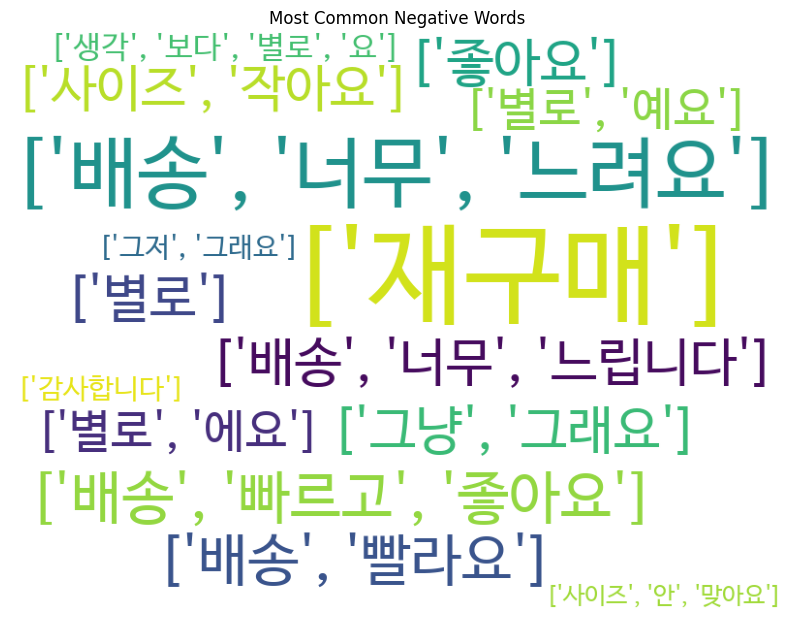

'긍정'

In [3]:
#https://hangeul.naver.com/font 에서 나눔글꼴 다운로드 

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['axes.facecolor'] = 'white'

from collections import Counter
import matplotlib.font_manager as fm
fontpath = 'C:/Users/user/Desktop/2025.01.22/NanumBarunGothic.ttf' #각자의 경로를 넣습니다. 
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

from wordcloud import WordCloud

negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
# positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

nw = Counter(negative_words)
print(nw.most_common(20))
nwc = nw.most_common(15)

# pw = Counter(positive_words)
# print(pw.most_common(20))
# pwc = pw.most_common(15)

#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정
negative_word_cloud = WordCloud(font_path=fontpath, 
               background_color='white', width=800, height=600)
# positive_word_cloud = WordCloud(font_path=fontpath, 
#                background_color='white', width=800, height=600)

'''부정'''
print(dict(nwc))
cloud = negative_word_cloud.generate_from_frequencies(dict(nwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Negative Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()

'''긍정'''
# print(dict(pwc))
# cloud = positive_word_cloud.generate_from_frequencies(dict(pwc))
# plt.figure(figsize=(10, 8))
# plt.title('Most Common Positive Words')
# plt.axis('off')
# plt.imshow(cloud)
# plt.show()

In [4]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [7]:
print(dict(list(tokenizer.word_index.items())[:10]))

{"'잘'": 1, "'너무'": 2, "'배송'": 3, "'요'": 4, "'좋아요'": 5, "'안'": 6, "'재구매'": 7, "'구매'": 8, "'사용'": 9, "'로'": 10}
